# Data Description:

The file "Bank_Personal_Loan_Modelling-1.csv " contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

# Context:

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns to better target marketing to increase the success ratio with a minimal budget.

The department wants to build a model that will help them identify the potential customers who have a higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.


# Attribute Information:

 ID : Customer ID

 Age : Customer's age in completed years

 Experience : #years of professional experience

 Income : Annual income of the customer ($000)

 ZIP Code : Home Address ZIP code.

 Family : Family size of the customer

 CCAvg : Avg. spending on credit cards per month ($000)

 Education : Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional

 Mortgage : Value of house mortgage if any. ($000)

 Personal Loan : Did this customer accept the personal loan offered in the last campaign?

 Securities Account : Does the customer have a securities account with the bank?

 CD Account : Does the customer have a certificate of deposit (CD)account with the bank?

 Online : Does the customer use internet banking facilities?

 Credit card : Does the customer use a credit card issued by UniversalBank?

# Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

# Importing the necessary library

In [166]:
#to perform numerical operation
import numpy as np

#to work with data frame
import pandas as pd

#importing ploting libraries
import matplotlib.pyplot as plt

# importing seaborn for statistical plots
import seaborn as sns

#Importing Sklearn package's for data splitting 
from sklearn.model_selection import train_test_split

# importing library for logistic regression
from sklearn.linear_model import LogisticRegression

# importing performance metrices -accuracy score & confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix

# importing libraries of KNN
from sklearn.neighbors import KNeighborsClassifier

# (1) Read the column description and ensure you understand each attribute well

In [167]:
#Reading the data as data frame

data_frame=pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')

#creating copy of original data so not to make any change in original data frame
data=data_frame.copy()

#printing top 5 rows of the data frame in order to see all the attributes/features
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [168]:
#Shape of the data
data.shape

(5000, 14)

The file contain 5000 rows/data points/data object and 14 attributes out of which one column correspond to target column

In [169]:
# dataframe columns/attribute name
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [170]:
# Data type of each attribute
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


The data has 5000 instances with 14 attributes. 13 integer type and 1 float type.Further we need to check whether the data type currently hold by each attribute is correct logically

In [171]:
# dropping id column as it will be 1-1 mapping anyways
data=data.drop('ID',axis=1)
# dropping zip code column as not relevant
data=data.drop('ZIP Code',axis=1)

In [172]:
# checking any null values
print(data.isnull().sum())

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


from the above we can see data contain no null values

In [173]:
data.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

Let us further dive deep down and check for attributes such as  'Experience','Family', 'Education','Personal Loan', 'Securities Account','CD Account',Online,CreditCard which currently hold integer value


In [174]:

#print(data['Education'].unique())

print(data['Experience'].value_counts())

print(data['Family'].value_counts())

print(data['Education'].value_counts())

print(data['Personal Loan'].value_counts())
#print(data['Personal Loan'].value_counts(normalize=True))

print(data['Securities Account'].value_counts())

print(data['CD Account'].value_counts())

print(data['Online'].value_counts())

print(data['CreditCard'].value_counts())


 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 39     85
 2      85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience, dtype: int64
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
1    2096
3    1501
2    1403
Name: Education, dtype: int64
0    4520
1     480
Name: Personal Loan, dtype: int64
0    4478
1     522
Name: Securities Account, dtype: int64
0    4698
1     302
Name: CD Account, dtype: int64
1    2984
0    2016
Name: Online, dtype: int64
0    3530
1    1470
Name: CreditCard, dtype: int64


1) As our Target column which is Personal Loan have 4520 number of '0' and 480 numbers of '1' and as there is huge difference so this is a class imbalance problem

2) For Education Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional

3)Some of the experience observed are negative which need to be imputed with proper value

3)For Personal Loan '0' stands for not accepting the loan and '1' stand for accepting the loan in the campaign
For Securities Account,CD Account, Online,CreditCard attributes '0' stand for No and '1' stand for Yes

4)Till now data type consider in these attribute are consider 'int' but actually they are categorical and so need to be change its data type

In [177]:
#converting the data type of attributes which takes only discrete or binary class values to categorical


data['Family'] = data['Family'].astype('category')
data['Education'] = data['Education'].astype('category')
data['Personal Loan'] = data['Personal Loan'].astype('category')
data['Securities Account'] = data['Securities Account'].astype('category')
data['CD Account'] = data['CD Account'].astype('category')
data['Online'] = data['Online'].astype('category')
data['CreditCard'] = data['CreditCard'].astype('category')


In [178]:
data.dtypes

Age                      int64
Experience               int64
Income                   int64
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan         category
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object

# 2)Study the data distribution in each attribute, share your findings

# (i) Univariate analysis

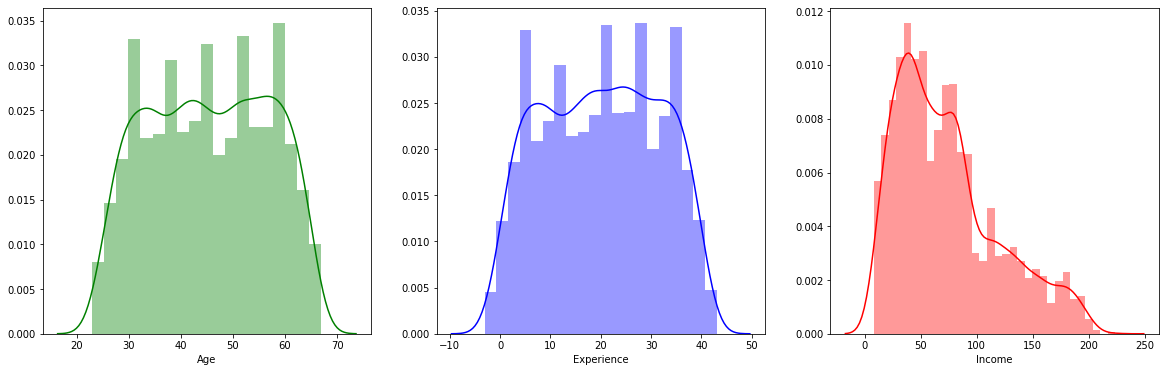

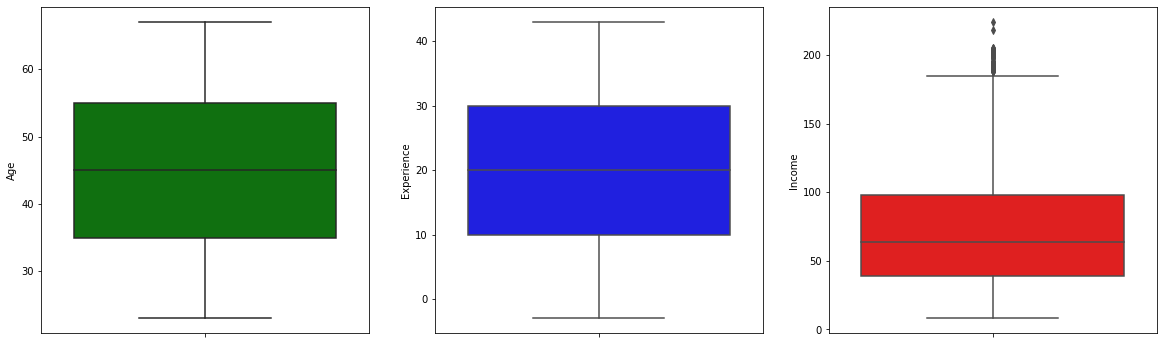

In [179]:

plt.figure(figsize=(20,6))

plt.subplot(1, 3, 1)
#plt.title('Age')
sns.distplot(data['Age'],color='green')

# subplot 2
plt.subplot(1, 3, 2)
#plt.title('Experience')
sns.distplot(data['Experience'],color='blue')

# subplot 3l
plt.subplot(1, 3, 3)
#plt.title('Income')
sns.distplot(data['Income'],color='red')



plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
#plt.title('Age')
sns.boxplot(data['Age'],orient='vertical',color='green')

# subplot 2
plt.subplot(1, 3, 2)
#plt.title('Experience')
sns.boxplot(data['Experience'],orient='vertical',color='blue')

# subplot 3
plt.subplot(1, 3, 3)
#plt.title('Income')
sns.boxplot(data['Income'],orient='vertical',color='red')



plt.show()

From the above we can observe followings:

(i) Age median and mode is nearly equal to 45

(ii)In Experience years there are some negative values which cant be possible and so need to be imputed with proper value.Mean and median in case of Experience is nearly same and it is 20

(iii)There is skewness present in Income .It is right skewed and also have some outliers


We can further check this with describe() function

In [180]:
# Checking basic details of the data
data.describe()

,Age,Experience,Income,CCAvg,Mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,1.937938,56.498800
std,11.463166,11.467954,46.033729,1.747659,101.713802
min,23.000000,-3.000000,8.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,0.700000,0.000000
50%,45.000000,20.000000,64.000000,1.500000,0.000000
75%,55.000000,30.000000,98.000000,2.500000,101.000000
max,67.000000,43.000000,224.000000,10.000000,635.000000


From the above we can note that

1) Some of the values of Experience column are negative which cant be

2) By comparing the difference between mean and median for Income,CCAvg,Mortgage attributes we can conclude that skewness is present

In [181]:
# Replacing the negative values present in Experience attribute with corresponding median value=20
data['Experience'].replace(-1,20)
data['Experience'].replace(-2,20)
data['Experience'].replace(-3,20)
#data['Experience'].replace(-3,20,inplace=True)

data['Experience']

0        1
1       19
2       15
3        9
4        8
5       13
6       27
7       24
8       10
9        9
10      39
11       5
12      23
13      32
14      41
15      30
16      14
17      18
18      21
19      28
20      31
21      27
22       5
23      18
24      11
25      19
26      16
27      20
28      30
29      13
        ..
4970    13
4971    28
4972    32
4973     1
4974    33
4975    11
4976     5
4977    15
4978    27
4979    26
4980     5
4981     9
4982    10
4983    26
4984     1
4985    23
4986     6
4987    23
4988     8
4989     0
4990    25
4991    25
4992     5
4993    21
4994    40
4995     3
4996     4
4997    39
4998    40
4999     4
Name: Experience, Length: 5000, dtype: int64

we have successfully converted negative Experience years values with positive value

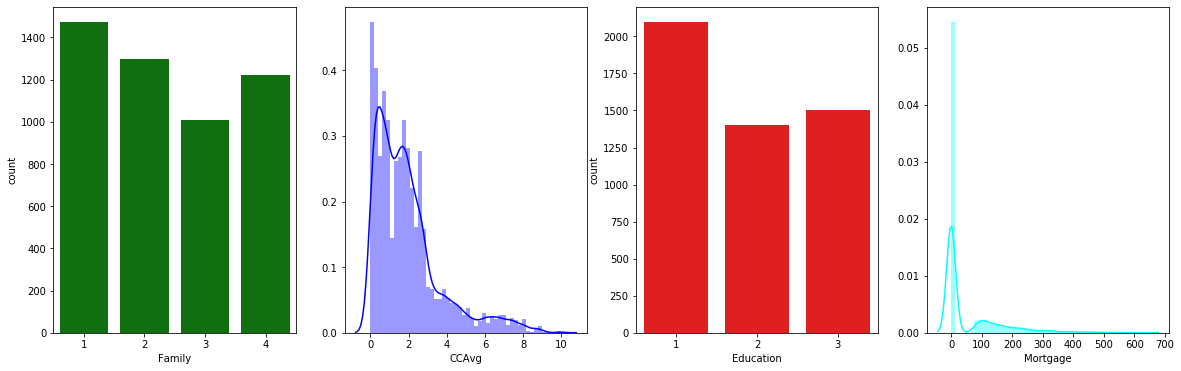

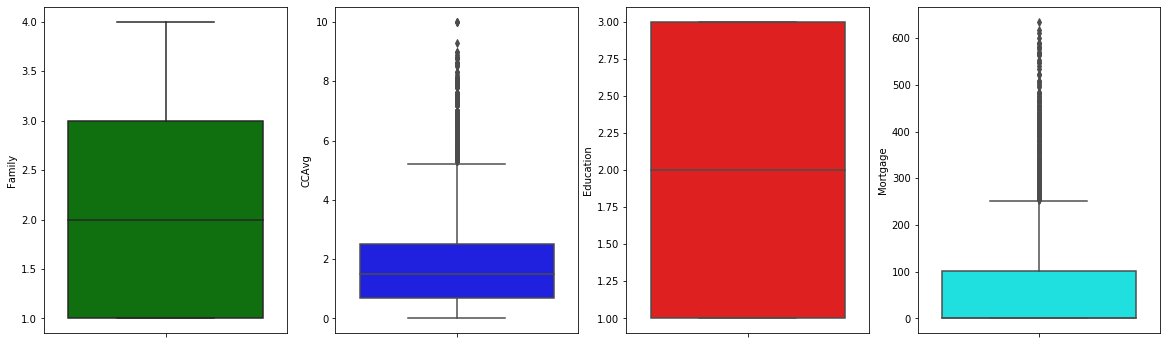

In [182]:
#Let us see for the distribution for the attributes 'Family','CCAvg','Education','Mortgage'

plt.figure(figsize=(20,6))

plt.subplot(1, 4, 1)
sns.countplot(data['Family'],color='green')

# subplot 2
plt.subplot(1, 4, 2)
sns.distplot(data['CCAvg'],color='blue')

# subplot 3l
plt.subplot(1, 4, 3)
sns.countplot(data['Education'],color='red')

plt.subplot(1, 4, 4)
sns.distplot(data['Mortgage'],color='cyan')



plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
sns.boxplot(data['Family'],orient='vertical',color='green')

# subplot 2
plt.subplot(1, 4, 2)
sns.boxplot(data['CCAvg'],orient='vertical',color='blue')

# subplot 3
plt.subplot(1, 4, 3)
sns.boxplot(data['Education'],orient='vertical',color='red')

plt.subplot(1, 4, 4)
sns.boxplot(data['Mortgage'],orient='vertical',color='cyan')

plt.show()

From the above we can note that 

(i)Customer with Family size of one is maximum

(ii)CCAvg is right skewed with some outliers

(iii)Customer with Education level undergrad(1) count is more than in compare to others.

(iv)Mortgage is skewed with outliers.Also median for mortgage equal to zero

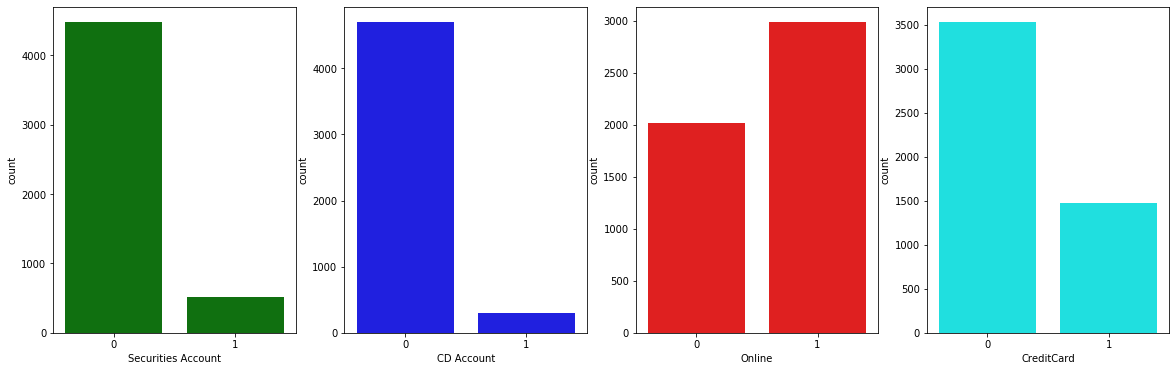

In [183]:


plt.figure(figsize=(20,6))

plt.subplot(1, 4, 1)
sns.countplot(data['Securities Account'],color='green')

# subplot 2
plt.subplot(1, 4, 2)
sns.countplot(data['CD Account'],color='blue')

# subplot 3l
plt.subplot(1, 4, 3)
sns.countplot(data['Online'],color='red')

plt.subplot(1, 4, 4)
sns.countplot(data['CreditCard'],color='cyan')


plt.show()

From the above we can note followings

(i)Customer which do not have securities account are more than the customer which have

(ii)Customers which have Certificate of deposit account (CD Account) with the bank is very less than the customers which do not have
(iii)Customers which uses Internet banking facilities is more than the customer which do not

(iv)Customers which uses Credit Card is very less than the Customers which dont use the credit card

# (ii) Bivariate Analysis

In [184]:
# using corr() function to check the linear dependency of continuous attributes
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,Experience,Income,CCAvg,Mortgage
Age,1,0.994215,-0.0552686,-0.0520122,-0.0125386
Experience,0.994215,1,-0.0465742,-0.0500765,-0.0105816
Income,-0.0552686,-0.0465742,1,0.645984,0.206806
CCAvg,-0.0520122,-0.0500765,0.645984,1,0.109905
Mortgage,-0.0125386,-0.0105816,0.206806,0.109905,1


From the above we can see that there is strong correlation between 'Age' and 'Experience'

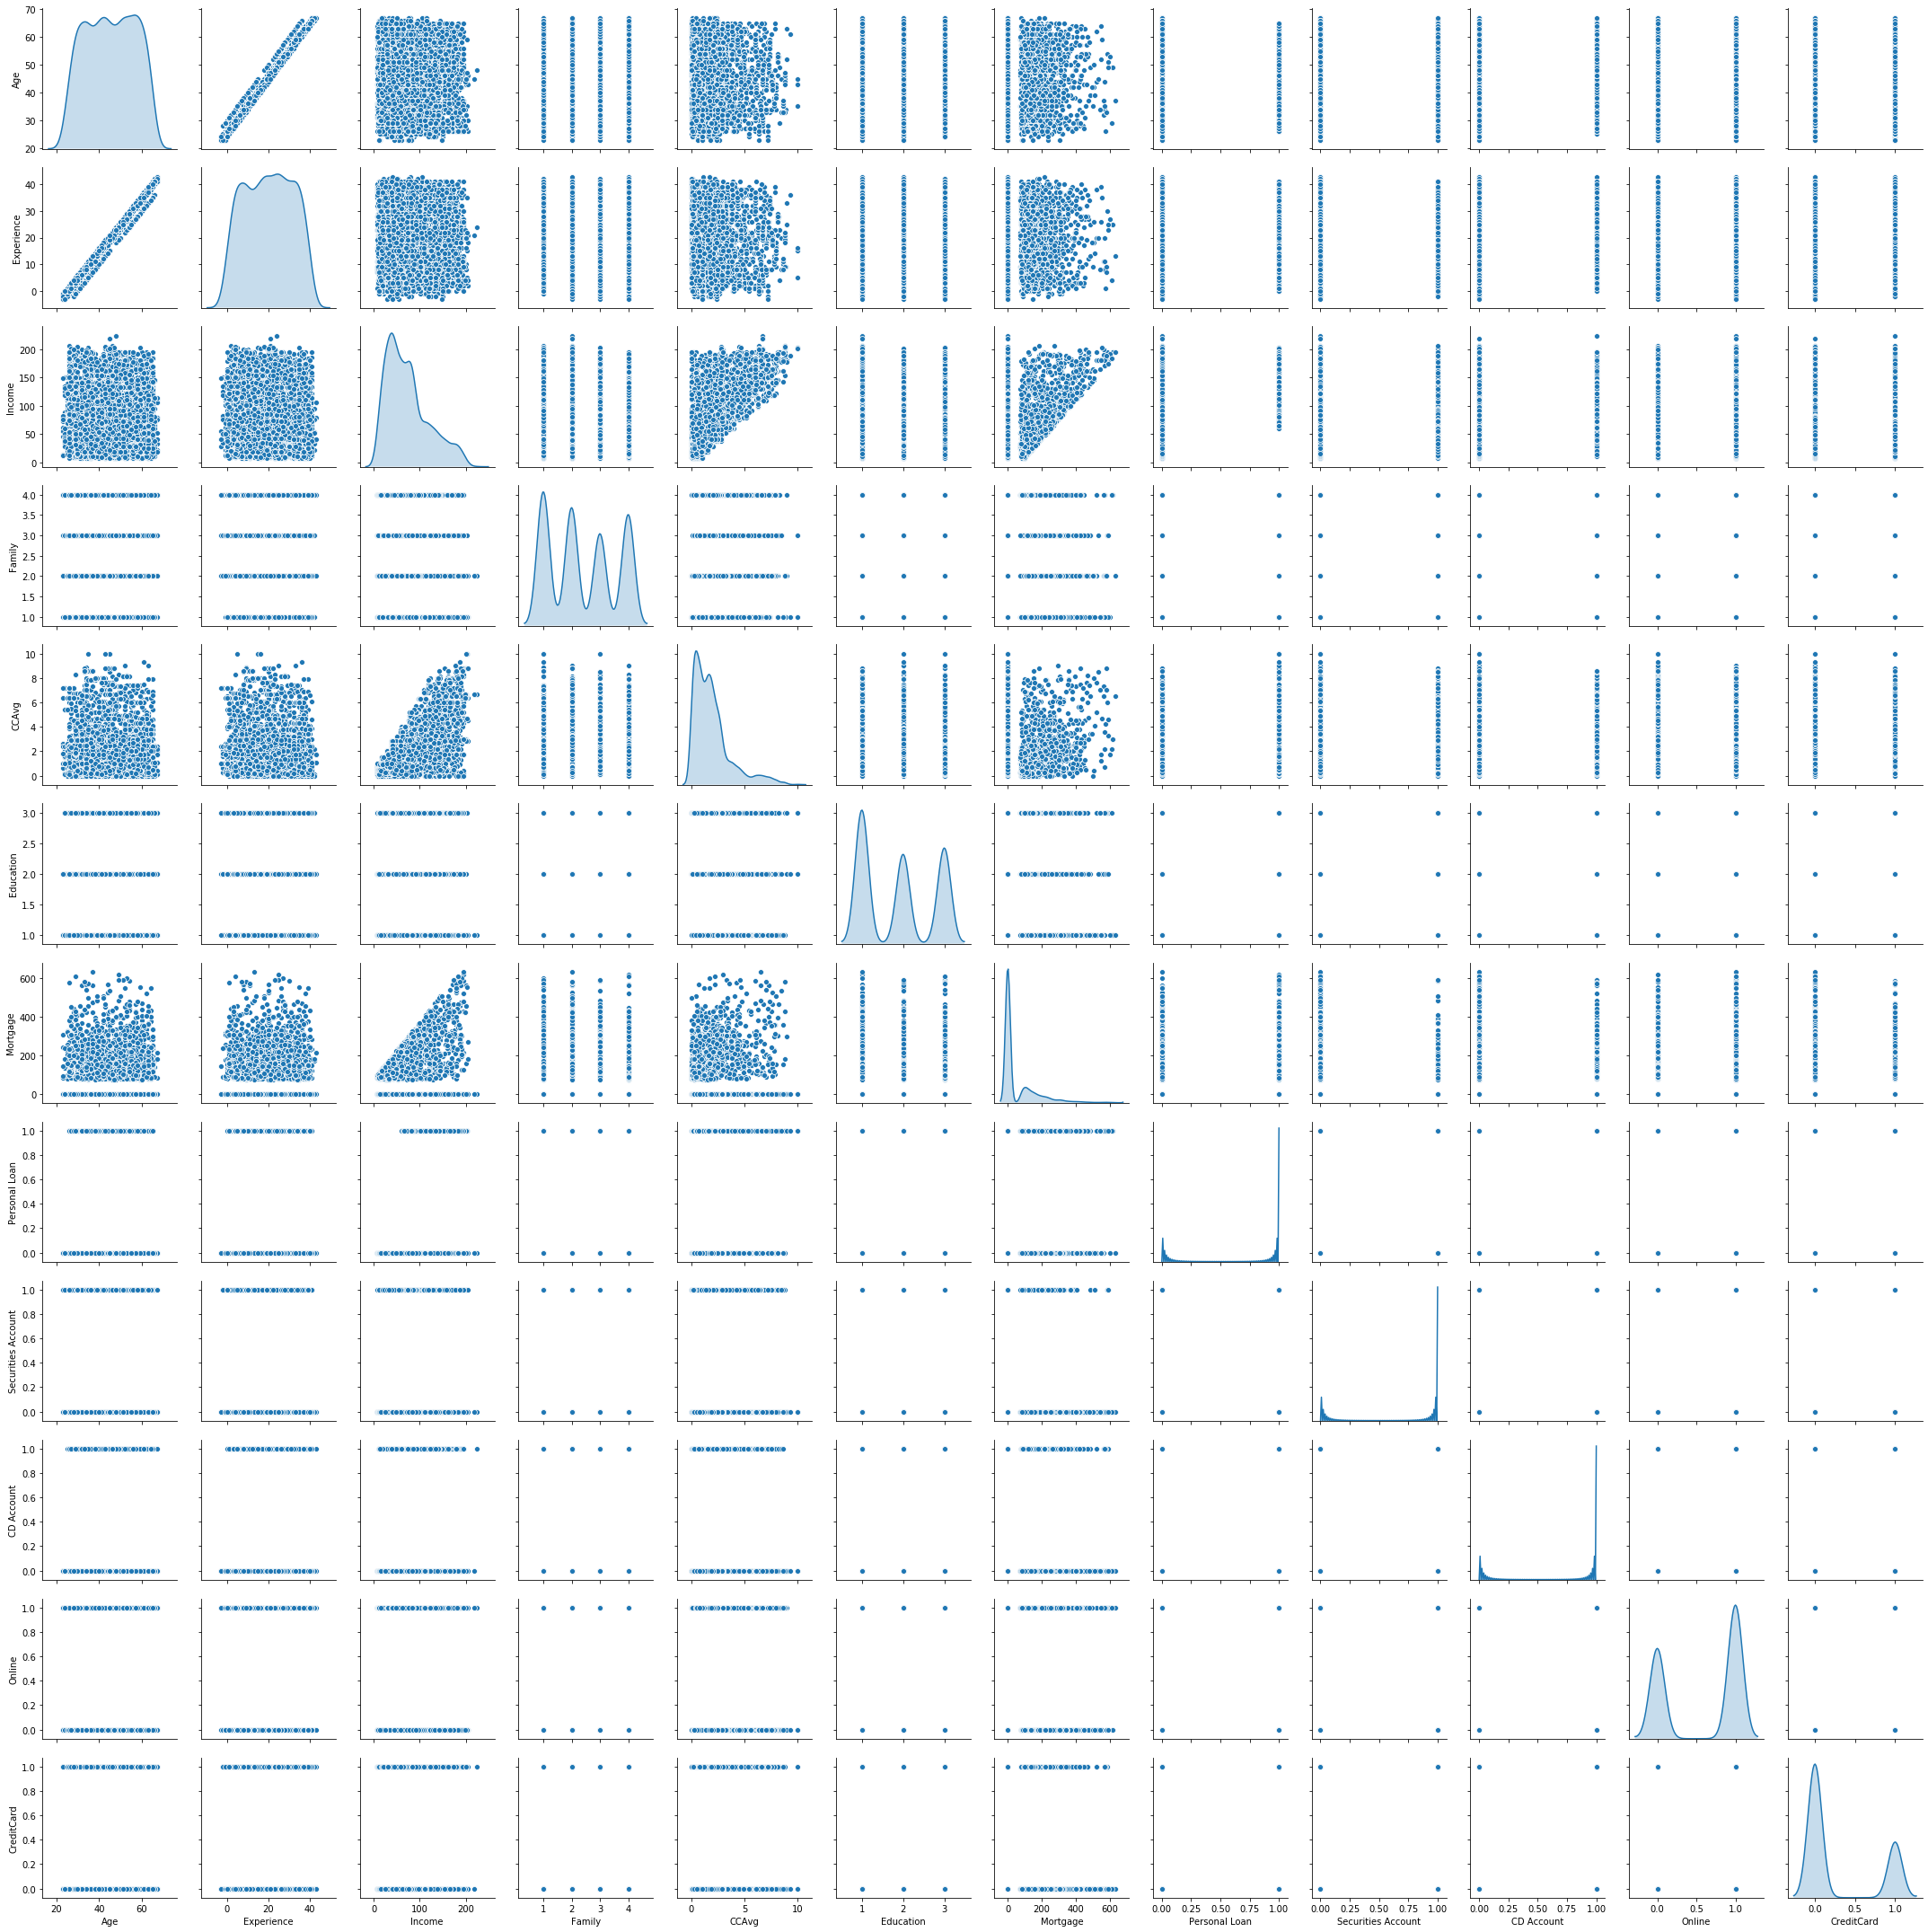

In [185]:
#Lets see the pairplot  for bivariate distribution
sns.pairplot(data,diag_kind='kde')

It looks like customer whose Avg. spending on credit cards per month is high have taken personal loan

Very few who have Income high have taken personal loan

Lets further dive deep down 


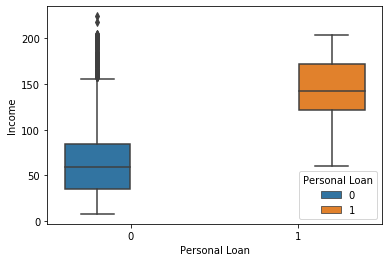

In [186]:
sns.boxplot(data['Personal Loan'], data['Income'], hue=data['Personal Loan'])

From the above we can observe that not all the customer which have high personal income have taken Personal loan.There are some outliers in group of customers who inspite of earning high have not taken Personal loan

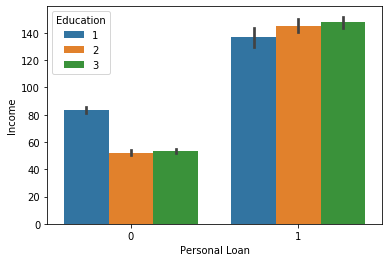

In [187]:
sns.barplot(data['Personal Loan'], data['Income'],hue=data['Education'])

From the above we can observe that customer who have good education qualification and very high income have taken Personal Loan

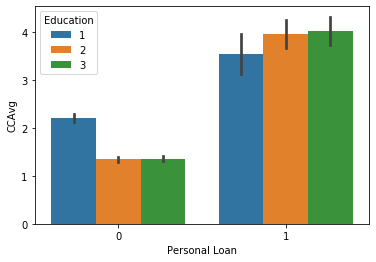

In [188]:
sns.barplot(data['Personal Loan'], data['CCAvg'],hue=data['Education'])

 The customers having higher Avg. spending on credit cards per month(CCAvg) have preffered Personal Loan 

# 3) Get the target column distribution. 

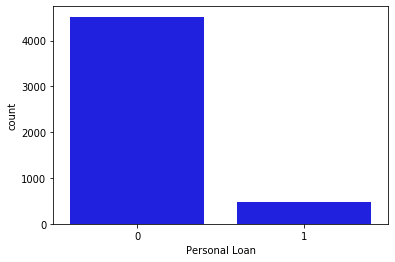

In [189]:
sns.countplot(data['Personal Loan'],color='blue')

In [190]:
data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

Customer which have taken personal loan(9.6%) is very less than compare to to customer which do not 

In [191]:
# Let us look at the target column which is 'Personal Loan' to understand how the data is distributed amongst the various values
data.groupby(["Personal Loan"]).mean()

,Age,Experience,Income,CCAvg,Mortgage
Personal Loan,,,,,
0,45.367257,20.132301,66.237389,1.729009,51.789381
1,45.066667,19.843750,144.745833,3.905354,100.845833


From the above we can observe that

(i)Customer with higher mean Avg. spending on credit cards per month(CCAvg) generally preffered Personal loan

(ii)Customer with higher mean Value of house mortgage if any (Mortgage) have high chance of prefering Personal loan

(iii)Customer with higher mean Annual income (Income) generally preferred Personal loan

# 4)Split the data into training and test set in the ratio of 70:30 respectively


In [192]:
from sklearn.model_selection import train_test_split

X = data.drop('Personal Loan',axis=1)     # Predictor feature columns 
Y = data['Personal Loan']   # Predicted class (1=True, 0=False) 

X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [194]:
#Convert categorical vriables to dummy variables i.e applying one hot encoding
X = pd.get_dummies(X, drop_first=True)
print(X)

      Age  Experience  Income  CCAvg  Mortgage  Family_2  Family_3  Family_4  \
0      25           1      49   1.60         0         0         0         1   
1      45          19      34   1.50         0         0         1         0   
2      39          15      11   1.00         0         0         0         0   
3      35           9     100   2.70         0         0         0         0   
4      35           8      45   1.00         0         0         0         1   
5      37          13      29   0.40       155         0         0         1   
6      53          27      72   1.50         0         1         0         0   
7      50          24      22   0.30         0         0         0         0   
8      35          10      81   0.60       104         0         1         0   
9      34           9     180   8.90         0         0         0         0   
10     65          39     105   2.40         0         0         0         1   
11     29           5      45   0.10    

In [195]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.
#kNN model is sensitive to distance

from scipy.stats import zscore
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,2.478018e-17,-1.693312e-16,1.939449e-16,-2.078338e-17,2.810197e-16,3.852474e-16,-7.339018e-16,-1.016964e-17,-2.122302e-16,-3.148592e-17,5.092149e-16,4.426903e-16,2.986500e-16,-3.697931e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.948906e+00,-2.014911e+00,-1.428969e+00,-1.108987e+00,-5.555239e-01,-5.915167e-01,-5.031231e-01,-5.687280e-01,-6.245376e-01,-6.549654e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
25%,-9.019702e-01,-8.812043e-01,-7.554825e-01,-7.084116e-01,-5.555239e-01,-5.915167e-01,-5.031231e-01,-5.687280e-01,-6.245376e-01,-6.549654e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
50%,-2.952359e-02,-9.121982e-03,-2.123482e-01,-2.506106e-01,-5.555239e-01,-5.915167e-01,-5.031231e-01,-5.687280e-01,-6.245376e-01,-6.549654e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,-6.453143e-01
75%,8.429230e-01,8.629604e-01,5.263146e-01,3.216407e-01,4.375576e-01,1.690569e+00,-5.031231e-01,-5.687280e-01,1.601185e+00,1.526798e+00,-3.414233e-01,-2.535403e-01,8.219509e-01,1.549632e+00
max,1.889859e+00,1.996667e+00,3.263712e+00,4.613525e+00,5.688108e+00,1.690569e+00,1.987585e+00,1.758310e+00,1.601185e+00,1.526798e+00,2.928915e+00,3.944146e+00,8.219509e-01,1.549632e+00


In [196]:
#splitting the data into 70:30 ratio

x_train, x_test, y_train, y_test = train_test_split(XScaled, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1
1334,0.144966,0.165294,-0.842384,-0.365061,-0.555524,1.690569,-0.503123,-0.568728,-0.624538,-0.654965,-0.341423,-0.25354,0.821951,-0.645314
4768,-0.640236,-0.532371,-0.755483,0.035515,-0.555524,-0.591517,-0.503123,-0.568728,1.601185,-0.654965,-0.341423,-0.25354,0.821951,-0.645314
65,1.191902,1.299002,1.243252,1.065567,-0.555524,-0.591517,-0.503123,-0.568728,-0.624538,-0.654965,-0.341423,-0.25354,0.821951,1.549632
177,-1.425438,-1.491662,-0.190623,-0.078935,1.843604,-0.591517,-0.503123,1.758310,1.601185,-0.654965,-0.341423,-0.25354,-1.216618,-0.645314
4489,-0.552992,-0.619580,-1.146539,-0.994537,-0.555524,-0.591517,1.987585,-0.568728,1.601185,-0.654965,-0.341423,-0.25354,0.821951,-0.645314


In [197]:
# lets check the split of the data
print("{0:0.2f}% data is in training set".format((len(x_train)/len(data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(data.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [198]:
# lets check the personal loan True(1) and False(0) in the split data

print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(data.loc[data['Personal Loan'] == 1]), (len(data.loc[data['Personal Loan'] == 1])/len(data.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(data.loc[data['Personal Loan'] == 0]), (len(data.loc[data['Personal Loan'] == 0])/len(data.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values   : 4520 (90.40%)

Training Personal Loan True Values    : 331 (9.46%)
Training Personal Loan False Values   : 3169 (90.54%)

Test Personal Loan True Values        : 149 (9.93%)
Test Personal Loan False Values       : 1351 (90.07%)



# 5)Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a customer buying personal loans

# (i) Logistic

In [200]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model_logistic = LogisticRegression(solver="liblinear")
model_logistic.fit(x_train, y_train)
#predict on test
y_pred_logistic = model_logistic.predict(x_test)


coef_df = pd.DataFrame(model_logistic.coef_)
coef_df['intercept'] = model_logistic.intercept_
print(coef_df)

          0        1         2         3         4         5         6  \
0 -0.104777  0.15886  2.615341  0.405669  0.089879 -0.002682  0.896141   

          7         8         9        10        11        12        13  \
0  0.631601  1.600879  1.743395 -0.302408  0.819076 -0.262738 -0.418426   

   intercept  
0   -4.94464  


From the above it can be observed that parameter such as 'Income' and 'Education' are dominating

In [212]:
#Predict for train set
#pred_train_logistic = model_logistic.predict(x_train)

#from sklearn.metrics import classification_report,confusion_matrix
#mat_train_logistic = confusion_matrix(y_train,pred_train_logistic)

#print("confusion matrix = \n",mat_train_logistic)

In [213]:
#Predict for test set
#pred_test_logistic = model_logistic.predict(x_test)

#mat_test_logistic = confusion_matrix(y_test,pred_test_logistic)
#print("confusion matrix = \n",mat_test_logistic)

In [203]:
model_score_logistic = model_logistic.score(x_test, y_test)
print(model_score_logistic)

0.9553333333333334


Fitting is quite good

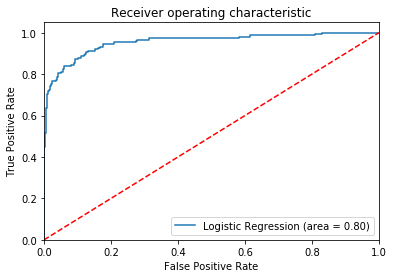

In [204]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, model_logistic.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model_logistic.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Area under ROC curve is measure of how good the model is in terms of distinguishing between two classes.Higher the AUC model is better at predicting 0s as 0s and 1s as 1s

As area under curve (AUC) is in the range of 0.5<AUC<1 there is a reasonable separation between two classes

# (ii) K-NN model

In [205]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

# instantiate learning model (k = 3)
model_knn = KNeighborsClassifier(n_neighbors = 3)

# fitting the model
model_knn.fit(x_train, y_train)

# predict the response
y_pred_knn = model_knn.predict(x_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred_knn))

# instantiate learning model (k = 5)
model_knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
model_knn.fit(x_train, y_train)

# predict the response
y_pred_knn = model_knn.predict(x_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred_knn))

# instantiate learning model (k = 9)
model_knn = KNeighborsClassifier(n_neighbors=9)

# fitting the model
model_knn.fit(x_train, y_train)

# predict the response
y_pred_knn = model_knn.predict(x_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred_knn))

0.9526666666666667
0.9486666666666667
0.9406666666666667


In [206]:
# cross validation
#Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from the above list using the Mis 
#classification error

# creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [207]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(x_train, y_train)
    # predict the response
    y_pred_knn = model_knn.predict(x_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred_knn)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 3


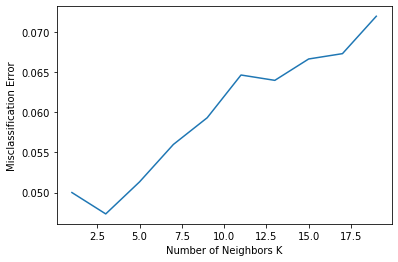

In [208]:
#Plot misclassification error vs k (with k value on X-axis) using matplotlib.

import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [209]:
#Use k=3 as the final model for prediction
model_knn = KNeighborsClassifier(n_neighbors = 3)

# fitting the model
model_knn.fit(x_train, y_train)

# predict the response
y_pred_knn = model_knn.predict(x_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred_knn))
print(recall_score(y_test, y_pred_knn))

0.9526666666666667
0.5369127516778524


Fitting is quite good and comparable to Logistic model

# (iii)Naive Bayes Classification model

In [210]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
model_NB = GaussianNB()

model_NB.fit(x_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [214]:
#Performance of our model with training data
ytrain_predict = model_NB.predict(x_train)

from sklearn import metrics

print("Model Train Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, ytrain_predict)))
print()

Model Train Accuracy: 0.8911



In [215]:
#Performance of our model with testing data
y_pred_NB = model_NB.predict(x_test)

from sklearn import metrics

print("Model Test Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, y_pred_NB)))
print()

Model Test Accuracy: 0.8760



Model Testing Accuracy is little less than Model train accuracy.Moreover fitting is less comparison to logistic and KNN model

# 6)Print the confusion matrix for all the above models

# (i) Confusion matrix for Logistic model

Confusion Matrix for Logistic classification model


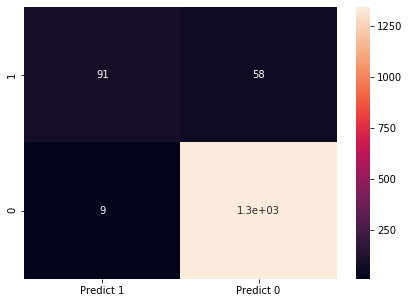

In [216]:
print("Confusion Matrix for Logistic classification model")
cm_logistic=metrics.confusion_matrix(y_test, y_pred_logistic, labels=[1, 0])

df_cm_logistic = pd.DataFrame(cm_logistic, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_logistic, annot=True)

In [218]:
#Predict for test set
pred_test_logistic = model_logistic.predict(x_test)

mat_test_logistic = confusion_matrix(y_test,y_pred_logistic)
print("confusion matrix = \n",mat_test_logistic)

confusion matrix = 
 [[1342    9]
 [  58   91]]


The confusion matrix

True Positives (TP): we correctly predicted that customer took Personal Loan 91

True Negatives (TN): we correctly predicted that customer don't took Personal Loan 1342

False Positives (FP): we incorrectly predicted that they have taken Personal Loan (a "Type I error") 9 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they don't have taken Personal Loan (a "Type II error") 58 Falsely predict negative Type II error

# (ii) Confusion matrix for k-NN model

Confusion Matrix for kNN model


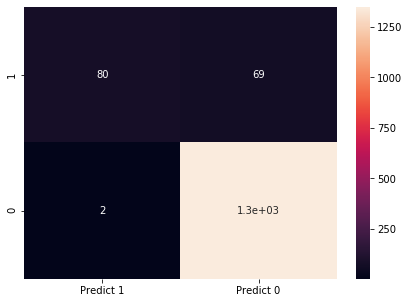

In [219]:
print("Confusion Matrix for kNN model")
cm_knn=metrics.confusion_matrix(y_test, y_pred_knn, labels=[1, 0])

df_cm_knn = pd.DataFrame(cm_knn, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_knn, annot=True)

In [220]:
print("Confusion Matrix:\n",confusion_matrix(y_pred_knn,y_test))

Confusion Matrix:
 [[1349   69]
 [   2   80]]


The confusion matrix

True Positives (TP): we correctly predicted that customer took Personal Loan 80

True Negatives (TN): we correctly predicted that customer don't took Personal Loan 1349

False Positives (FP): we incorrectly predicted that they have taken Personal Loan (a "Type I error") 2 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they don't have taken Personal Loan (a "Type II error") 69 Falsely predict negative Type II error

# (iii)Confusion matrix of Naive Bayes

Confusion Matrix for Naive Bayes


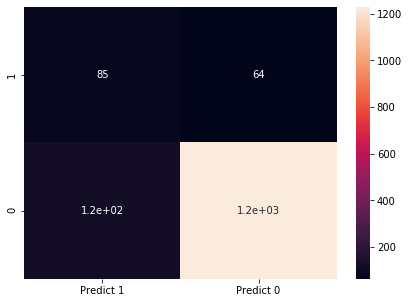

In [221]:
print("Confusion Matrix for Naive Bayes")
cm_NB=metrics.confusion_matrix(y_test, y_pred_NB, labels=[1, 0])

df_cm_NB = pd.DataFrame(cm_NB, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_NB, annot=True)

In [222]:
print("Confusion Matrix:\n",confusion_matrix(y_pred_NB,y_test))

Confusion Matrix:
 [[1229   64]
 [ 122   85]]


The confusion matrix

True Positives (TP): we correctly predicted that customer took Personal Loan 85

True Negatives (TN): we correctly predicted that customer don't took Personal Loan 1229

False Positives (FP): we incorrectly predicted that they have taken Personal Loan (a "Type I error") 122 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they don't have taken Personal Loan (a "Type II error") 64 Falsely predict negative Type II error

# 7)Give your reasoning on which is the best model in this case and why it performs better

In [163]:
print("Classification Report of Logistic Model")
print(metrics.classification_report(y_test, y_pred_logistic, labels=[1, 0]))

Classification Report of Logistic Model
              precision    recall  f1-score   support

           1       0.91      0.61      0.73       149
           0       0.96      0.99      0.98      1351

    accuracy                           0.96      1500
   macro avg       0.93      0.80      0.85      1500
weighted avg       0.95      0.96      0.95      1500



In [164]:
print("Classification Report of kNN Model")
print(metrics.classification_report(y_test, y_pred_knn, labels=[1, 0]))

Classification Report of kNN Model
              precision    recall  f1-score   support

           1       0.98      0.54      0.69       149
           0       0.95      1.00      0.97      1351

    accuracy                           0.95      1500
   macro avg       0.96      0.77      0.83      1500
weighted avg       0.95      0.95      0.95      1500



In [165]:
print("Classification Report of Naive Bayes Model")
print(metrics.classification_report(y_test, y_pred_NB, labels=[1, 0]))

Classification Report of Naive Bayes Model
              precision    recall  f1-score   support

           1       0.41      0.57      0.48       149
           0       0.95      0.91      0.93      1351

    accuracy                           0.88      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.88      0.88      1500



If we see accuracy of logistic and kNN are nearly same 0.95 and greater than Naive Bayes .Clearly by this logistic and kNN works well.But as this data set is class imbalance problem problem so need to compare other parameters like precision and recall.

By comparing Precision and Recall of Logistic and kNN we can say Logistic is the best model.Moreover if we compare confusion matrrix of both we can see FP,FN are less in logistic than in compare to KNN 